<h2> 1. Преобразуйте данные:
<h3> a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
<h3> b. закодируйте категориальные переменные числовыми значениями по необходимости. <h3>

In [221]:
import pandas as pd
import numpy as np

In [222]:
# загружаем данные
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [224]:
#Расчет количества пустых значений в признаках 
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [225]:
#расчет количества нулевых значений всего
data.isnull().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [226]:
# просмотр уникальных значений кроме 'id'
data2=data.drop('id', axis=1)
for col in data2:
    print(col,data2[col].unique())

name ['A Jesus Garcia' 'A Lam Shin' 'Aaron Brown' ... 'di Xiao'
 'le Quoc Toan Tran' 'le Roux Hamman']
nationality ['ESP' 'KOR' 'CAN' 'MDA' 'NZL' 'AUS' 'USA' 'ETH' 'BRN' 'IOA' 'GBR' 'UZB'
 'RSA' 'EGY' 'MAR' 'QAT' 'SUD' 'ALG' 'DEN' 'NED' 'DJI' 'SEN' 'CMR' 'ITA'
 'NIG' 'SWE' 'GHA' 'AFG' 'AZE' 'KSA' 'BAN' 'NGR' 'RUS' 'IND' 'HUN' 'KAZ'
 'BDI' 'ERI' 'POL' 'BRA' 'GEO' 'CZE' 'SEY' 'GAM' 'LTU' 'IRI' 'ROU' 'CUB'
 'SLO' 'BAH' 'ARG' 'PUR' 'FRA' 'RWA' 'TOG' 'MDV' 'TUN' 'ISR' 'LAT' 'JOR'
 'MAS' 'LIB' 'LBA' 'PLE' 'IRQ' 'TUR' 'VEN' 'JPN' 'TPE' 'KGZ' 'CHN' 'MEX'
 'GRE' 'IRL' 'JAM' 'SUI' 'BAR' 'HON' 'ANG' 'GER' 'COL' 'URU' 'MNE' 'SRB'
 'BUL' 'FIN' 'UKR' 'BLR' 'SMR' 'COK' 'SAM' 'AUT' 'BEL' 'KEN' 'SVK' 'POR'
 'ECU' 'UAE' 'NAM' 'GUY' 'EST' 'SKN' 'ARU' 'PAN' 'PER' 'TAN' 'FIJ' 'GUI'
 'NOR' 'ARM' 'THA' 'SIN' 'TKM' 'CRO' 'BIH' 'TGA' 'MAW' 'DOM' 'GUA' 'MKD'
 'TJK' 'CYP' 'CHI' 'MLT' 'ZIM' 'TTO' 'CRC' 'BOL' 'BUR' 'ISL' 'HAI' 'ROT'
 'MGL' 'MAD' 'GAB' 'SRI' 'LAO' 'MRI' 'PAR' 'IVB' 'GBS' 'TLS' 'MLI' 'SYR'
 'BOT' 'C

In [227]:
# заменяем отсутствующие значения Модой
cols = list(data)
data[cols]=data[cols].fillna(data.mode().iloc[0])
data.isnull().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

<h2>2.	Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.<h2>

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [229]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,LabelBinarizer
le = LabelEncoder()
ohe = OneHotEncoder()
lb = LabelBinarizer()

In [230]:
# оставляем столбцы исходных данных. Перекодируем категорию sport
X = pd.get_dummies( data, columns = [ 'sport'] )
X=X.drop(columns=['id','name','sex','dob','nationality', 'gold', 'silver', 'bronze'])

X.head()

,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_boxing,sport_canoe,sport_cycling,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [231]:
#Нормализуем данные
X=(X-X.min())/(X.max()-X.min())
X

,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_boxing,sport_canoe,sport_cycling,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,0.51,0.237410,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.47,0.179856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.77,0.345324,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.62,0.352518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.60,0.287770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11533,0.43,0.194245,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11534,0.52,0.230216,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11535,0.64,0.496403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11536,0.39,0.179856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [232]:
X.shape

(11538, 30)

In [233]:
# задаем столбец целевой переменной и нормализуем ее
le.fit( data['sex'] )
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [234]:
#Определяем зависимость пола от роста, веса и вида спорта
model = LogisticRegression()

In [235]:
# разбиваем на обучающую (80% данных) и тестовую (20% данных) выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [236]:
model.fit(X_train, y_train)

LogisticRegression()

<h2>3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve. <h2>

In [237]:
from sklearn.metrics import roc_curve

In [238]:
predictions = model.predict_proba(X_test)

In [239]:
y_predictions=predictions[:, 1]
y_predictions

array([0.31872405, 0.10078571, 0.92957679, ..., 0.97168501, 0.24203644,
       0.96136896])

In [240]:
y_predictions

array([0.31872405, 0.10078571, 0.92957679, ..., 0.97168501, 0.24203644,
       0.96136896])

In [241]:
y_test

1776     1
7085     1
4085     1
7332     0
4869     0
        ..
650      0
6615     0
5225     1
11504    0
1773     1
Length: 2308, dtype: int64

In [242]:
fpr, tpr, thres = roc_curve( y_test, y_predictions)

In [243]:
from matplotlib import pyplot as plt

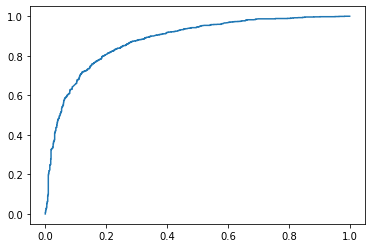

In [244]:
# строим кривую ROC на основе использования пакета sklearn
plt.plot( fpr, tpr )

<h2>4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score. <h2>

In [245]:
from sklearn.metrics import roc_auc_score

In [246]:
roc_auc_score(y_test, y_predictions)

0.878987332112332

<h2>5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.<h2>

In [247]:
# формируем таблицу результатов
y=pd.DataFrame({ 'y_real':y_test,'y_pred':y_predictions}).reset_index(drop=True)
y

,y_real,y_pred
0,1,0.318724
1,1,0.100786
2,1,0.929577
3,0,0.501471
4,0,0.420648
...,...,...
2303,0,0.098669
2304,0,0.213690
2305,1,0.971685
2306,0,0.242036


In [248]:
# задаем пороговые значение и рассчитываем метрики
tresholdlist = list(np.array(list(range(0,100,5)))/100)
roc_point = []
roc_point2 = []

for TH in tresholdlist:
    
    FP = 0; TN = 0; TP = 0; FN = 0

    for index,instance in y.iterrows():
        fact = instance ["y_real"]
        prediction = instance ["y_pred"]

        if prediction >= TH: 
            prediction_class = 1
        else: 
            prediction_class = 0
        
        if prediction_class == 1 and fact == 1:            
            TP = TP + 1 
        elif fact == 1 and prediction_class == 0:
            FN = FN + 1
        elif fact == 0 and prediction_class == 1:
            FP = FP + 1
        elif fact == 0 and prediction_class == 0:
            TN = TN + 1
            
    TPR = TP/(TP + FN) # и Recall
    FPR = FP/(TN + FP)
    Presicion = TP/(TP + FP)
    
    
    roc_point.append ([FPR,TPR])
    roc_point2.append ([Presicion,TPR])
print("FP=",FP,"TN=",TN,"TP=",TP,"FN=",FN)



FP= 11 TN= 997 TP= 260 FN= 1040


In [249]:
# формируем итоговые таблицы
pivot = pd.DataFrame(roc_point,columns = ["FPR","TPR"])
pivot["treshold"] = tresholdlist
pivot2 = pd.DataFrame(roc_point,columns = ["Presicion","TPR"])
pivot2["treshold"] = tresholdlist

In [250]:
pivot

,FPR,TPR,treshold
0,1.000000,1.000000,0.00
1,0.922619,0.997692,0.05
2,0.819444,0.992308,0.10
3,0.703373,0.986923,0.15
4,0.616071,0.972308,0.20
5,0.538690,0.953846,0.25
6,0.463294,0.936923,0.30
7,0.394841,0.911538,0.35
8,0.311508,0.881538,0.40
9,0.255952,0.850000,0.45


 <h2> 6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод. <h2>

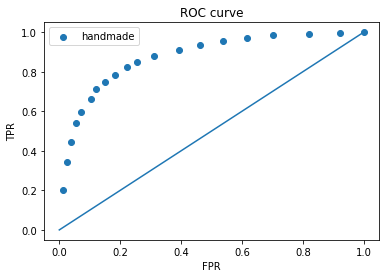

In [251]:
#строим ROC-кривую с шагом порога 0,05
plt.scatter (pivot.FPR,pivot.TPR,label = 'handmade')
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()

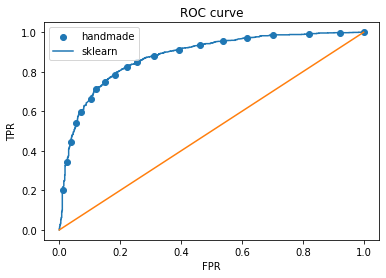

In [252]:
#объединяем график с пакетным решением matplotlib
plt.scatter (pivot.FPR,pivot.TPR, label = 'handmade')
plt.plot(fpr,tpr, label = 'sklearn')
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()

<h3>Графики в целом совпадают. При ручном расчете появляется возможность вариации точек за счет установления различных пороговых значений.

<h2>7.	Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.<h2>

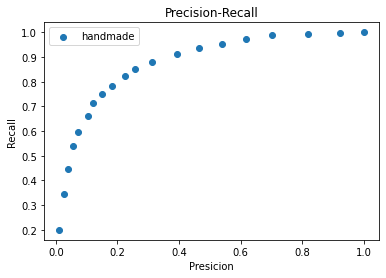

In [253]:
plt.scatter (pivot2.Presicion,pivot.TPR, label = 'handmade')
plt.xlabel('Presicion')
plt.ylabel('Recall')
plt.title('Precision-Recall')
plt.legend()

<h2>8.	*Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.  <h2>

In [254]:
roc_auc_score(y_test,y_predictions)

0.878987332112332

<h2>Сформулируйте выводы по проделанной работе:
<h3>a. Как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

Качество модели можно назвать хорошим так как кривая проходит выше диагонали и имеет быстрый подъем по оси y (рост доли угаданных положительных ответов) из точки (0,0). При этом заданное количество положительных-P и отрицательных ответов-N (классов) отличается, но не значительно.
В качестве порога модели можно использовать значение около 0,2 при котором Recall составит около 80%. 
Дальнейшее увеличение порога ведет к значительному росту ошибки (Presicion).
В лучшем случае график ROC-кривой проходит через верхний левый угол, где доля истинно положительных случаев составляет 100% (Recall), а доля ложно положительных ответов (FPR) равна нулю. То есть чем ближе кривая к верхнему левому углу, тем выше предсказательная способность модели. 
И, наоборот, чем ближе она расположена к диагональной прямой, тем менее эффективна модель. Диагональная линия соответствует «бесполезному» классификатору, т.е. отражает неразличимость двух классов.  
В целом можно ориентироваться на значения по оси х. Идеальный результат это точка в левом верхнем углу. 

<h3>b. Может ли ROC-кривая проходить ниже диагонали?

Кривая может проходить ниже диагонали, но это будет означать, что модель начинает больше ошибаться чем угадывать.
При этом худшей точкой будет правый нижний угол, который показывает, что все предсказания были ошибочными.<h3>